In [89]:
import os
import numpy as np
import pickle
import fitsne
from keras.models import model_from_json
from keras import backend as K
import matplotlib.pyplot as plt

os.environ['CUDA_VISIBLE_DEVICES'] = '7'

%matplotlib inline

In [90]:
with open('vae_results_6.pkl', 'rb') as f:
    xs = pickle.load(f)

In [91]:
np.set_printoptions(suppress='False')
print(xs[1])
np.set_printoptions(suppress='True')

(array([[0.6335972 , 0.03673481],
       [0.28698522, 0.00001014],
       [0.55445915, 0.00544293],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.74771553, 0.00510243],
       [0.7483631 , 0.0046756 ],
       [0.74363315, 0.00881166],
       [0.        , 0.        ],
       [0.7003859 , 0.33957583],
       [0.        , 0.        ],
       [0.11562094, 0.00000002],
       [0.69221324, 0.38635263],
       [0.6790371 , 0.28431576],
       [0.67225015, 0.4071295 ],
       [0.42749736, 0.0003175 ],
       [0.06510632, 0.        ],
       [0.6996205 , 0.34378996],
       [0.68769705, 0.00000235],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.67912203, 0.2817073 ],
       [0.7031266 , 0.00000597],
       [0.51002777, 0.        ],
       [0.57120925, 0.00793481],
       [0.09076989, 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.6774206 , 0.31749958],
       [0

In [92]:
x = xs[1][0]
# x = xs[1][0]
# x_sigma = xs[1][1]
x_orig = xs[0]

In [93]:
xs[2].shape

(300,)

In [94]:
np.zeros_like(xs[1][1][0]).shape

(300, 1)

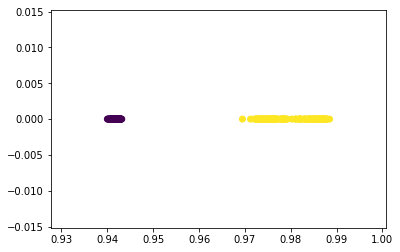

In [95]:
plt.scatter(xs[1][1][0].flatten(), np.zeros_like(xs[1][1][0]).flatten(), c=xs[2])

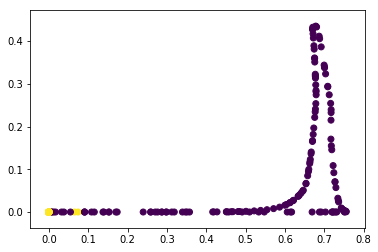

In [96]:
plt.scatter(x[:,0], x[:,1], c=xs[2])

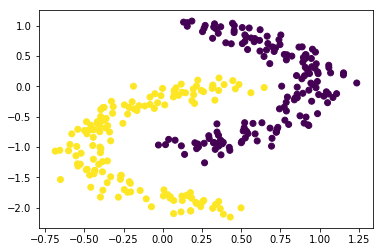

In [97]:
plt.scatter(x_orig[:,0], x_orig[:,1], c=xs[2])

In [4]:
def predict_with_K_fn(K_fn, x, bs=1000):
    '''
    Convenience function: evaluates x by K_fn(x), where K_fn is
    a Keras function, by batches of size 1000.
    '''
    if not isinstance(x, list):
        x = [x]
    num_outs = len(K_fn.outputs)
    y = [np.empty((len(x[0]), output_.get_shape()[1])) for output_ in K_fn.outputs]
    recon_means = []
    for i in range(int(x[0].shape[0]/bs + 1)):
        x_batch = []
        for x_ in x:
            x_batch.append(x_[i*bs:(i+1)*bs])
        temp = K_fn(x_batch)
        for j in range(num_outs):
            y[j][i*bs:(i+1)*bs] = temp[j]

    return y

In [5]:
'''
Convenience function: embeds x into the code space using the corresponding
autoencoder (specified by dset).
'''
dset = 'mnist'
if dset == 'reuters':
    dset = 'reuters10k'

json_path = '../pretrain_weights/ae_{}.json'.format(dset)
weights_path = '../pretrain_weights/ae_{}_weights.h5'.format(dset)

with open(json_path) as f:
    pt_ae = model_from_json(f.read())
pt_ae.load_weights(weights_path)

x = x.reshape(-1, int(np.prod(x.shape[1:])))

get_embeddings = K.function([pt_ae.input],
                              [pt_ae.layers[3].output])

get_reconstruction = K.function([pt_ae.layers[4].input],
                              [pt_ae.output])
# x_embedded = predict_with_K_fn(get_embeddings, x)[0]
x_recon = predict_with_K_fn(get_reconstruction, x)[0]
x_orig_recon = predict_with_K_fn(get_reconstruction, x_orig)[0]
# reconstruction_mse = np.mean(np.square(x - x_recon))
# print("using pretrained embeddings; sanity check, total reconstruction error:", np.mean(reconstruction_mse))

In [ ]:
y_recon = fitsne.FItSNE(x_recon)
y_orig_recon = fitsne.FItSNE(x_orig_recon)

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(y_recon[:,0], y_recon[:,1], c='b', s=1, label='recon')
ax1.scatter(y_orig_recon[:,0], y_orig_recon[:,1], c='r', s=1, label='orig')

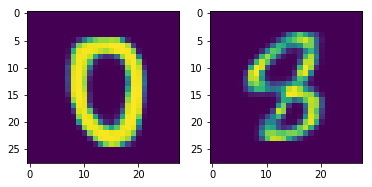

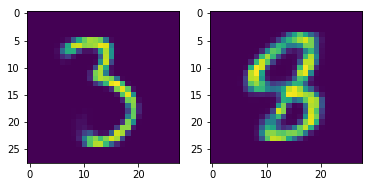

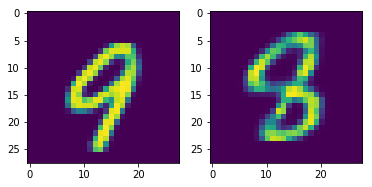

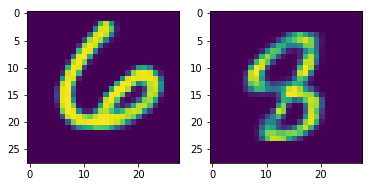

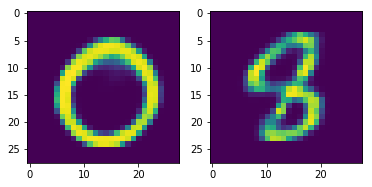

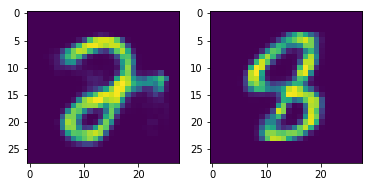

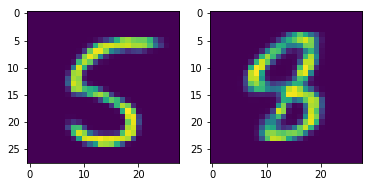

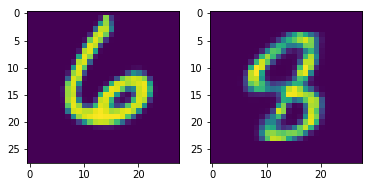

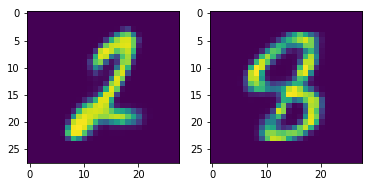

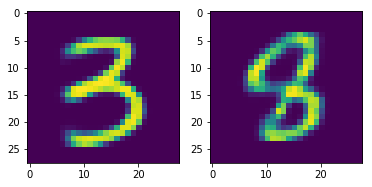

<Figure size 432x288 with 0 Axes>

In [6]:
n_imgs = 10
for i in range(n_imgs):
    idx = np.random.randint(len(x_recon))
    plt.subplot(1,2,1)
    plt.imshow(x_orig_recon[idx].reshape(28, 28))
    plt.subplot(1,2,2)
    plt.imshow(x_recon[idx].reshape(28, 28))
    plt.figure()

In [ ]:
np.mean(x_sigma)